In [9]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
imgs_path='/content/drive/My Drive/ml/Flickr8k/Images/'
caption_path='/content/drive/My Drive/ml/Flickr8k/captions.txt'

In [11]:
imgs_path

'/content/drive/My Drive/ml/Flickr8k/Images/'

In [12]:
from glob import glob
images = glob(imgs_path+'*.jpg')

In [13]:
images[0]

'/content/drive/My Drive/ml/Flickr8k/Images/408748500_e8dc8c0c4f.jpg'

In [14]:
import numpy as np
import pandas as pd
import cv2
import os
img = cv2.imread(images[0])
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (224,224))
    
img = img.reshape(1,224,224,3)

In [15]:
from keras.applications import ResNet50

incept_model = ResNet50(include_top=True)

102973440/102967424 [==============================] - 1s 0us/step


In [16]:
from keras.models import Model
last = incept_model.layers[-2].output
modele = Model(inputs = incept_model.input,outputs = last)
modele.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
import numpy as np
import pandas as pd
import cv2
import os

images_features = {}
count = 0
for i in images:
    img = cv2.imread(i)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (224,224))
    
    img = img.reshape(1,224,224,3)
    pred = modele.predict(img).reshape(2048,)
        
    img_name = i.split('/')[-1]
    
    images_features[img_name] = pred
    
    count += 1
    
    if count>1500:
        break
    if count % 100 == 0:
        print(int(count/1500)*100,' %')
print('Done')

In [ ]:
from pickle import dump,load
dump(images_features, open('/content/drive/My Drive/ml/Flickr8k/images_features_mi.pkl', 'wb'))


In [20]:
from pickle import dump,load
images_features=load(open('/content/drive/My Drive/ml/Flickr8k/images_features_mi.pkl', 'rb'))

In [21]:
f = open("/content/drive/My Drive/ml/Flickr8k/captions.txt", "r")
text=f.read()

In [22]:
f.close()

In [23]:
text=text.split('\n')

In [24]:
captions_dict = {}
for i in text:
    splited_text=i.split(',')
    print(splited_text)
    img_name = splited_text[0] 
    caption = splited_text[1]
    if img_name in images_features:
        if img_name not in captions_dict:
            captions_dict[img_name] = [caption]                
        else:
            captions_dict[img_name].append(caption)

Streaming output truncated to the last 5000 lines.
['3380407617_07b53cbcce.jpg', 'A child stands in the snow and looks at a pretty sky .']
['3380407617_07b53cbcce.jpg', '"Boy in winter gear facing away in snowy area ', ' lake and sunset in distance ."']
['3380407617_07b53cbcce.jpg', 'Someone with a red had and red and white mittens standing in the snow overlooking a lake .']
['3380519003_9f91d5a7fb.jpg', 'A dog is chasing after a ball in a field .']
['3380519003_9f91d5a7fb.jpg', 'A small brown and white dog chases a white ball over the grass .']
['3380519003_9f91d5a7fb.jpg', 'A small dog chases a white ball on the grass']
['3380519003_9f91d5a7fb.jpg', 'A small dog is playing with a ball on the grass .']
['3380519003_9f91d5a7fb.jpg', 'The small dog is chasing a ball .']
['3380643902_7e0670f80f.jpg', 'A long-boarder catches himself before hitting the ground .']
['3380643902_7e0670f80f.jpg', 'a man wearing a blue and black striped shirt skateboarding down a steap street']
['3380643902_7e0

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [25]:
len(captions_dict)

1501

In [26]:
def preprocessed(txt):
    modified = txt.lower()
    modified = 'startofseq ' + modified + ' endofseq'
    return modified

for k,v in captions_dict.items():
    for vv in v:
        captions_dict[k][v.index(vv)] = preprocessed(vv)

In [27]:
len(captions_dict)

1501

In [28]:
count_words = {}
for k,vv in captions_dict.items():
    for v in vv:
        for word in v.split():
            if word not in count_words:

                count_words[word] = 0

            else:
                count_words[word] += 1
                
                

THRESH = -1
count = 1
new_dict = {}
for k,v in count_words.items():
    if count_words[k] > THRESH:
        new_dict[k] = count
        count += 1
        
count_words

{'startofseq': 7504,
 'a': 11289,
 'man': 1352,
 'lays': 13,
 'on': 1940,
 'bench': 66,
 'while': 341,
 'his': 407,
 'dog': 1424,
 'sits': 105,
 'by': 221,
 'him': 75,
 '.': 6406,
 'endofseq': 7504,
 'the': 3248,
 'to': 546,
 'which': 7,
 'white': 654,
 'is': 1752,
 'also': 4,
 'tied': 4,
 'sleeping': 6,
 'outside': 133,
 'with': 1417,
 'and': 1466,
 'black': 642,
 'sitting': 248,
 'next': 142,
 'shirtless': 23,
 'lies': 5,
 'park': 89,
 'laying': 39,
 'holding': 221,
 'leash': 23,
 'of': 1172,
 'ground': 65,
 'in': 3344,
 'an': 455,
 'orange': 131,
 'hat': 137,
 'starring': 1,
 'at': 548,
 'something': 54,
 'wears': 21,
 'glasses': 21,
 'gauges': 1,
 'wearing': 553,
 'blitz': 0,
 'beer': 3,
 'can': 4,
 'crocheted': 0,
 'pierced': 2,
 'ears': 13,
 'leaps': 33,
 'over': 252,
 'log': 3,
 'grey': 43,
 'leaping': 34,
 'fallen': 10,
 'tree': 45,
 'large': 216,
 'mottled': 0,
 'blue': 403,
 'collar': 55,
 'jumping': 247,
 'jumped': 4,
 'stump': 2,
 'brown': 474,
 'chases': 22,
 'water': 510,

In [29]:
len(new_dict), len(count_words)

(4029, 4029)

In [30]:
new_dict['<OUT>'] = len(new_dict)

In [31]:
captions_backup = {key: value[:] for key, value in captions_dict.items()}


for k, vv in captions_dict.items():
    for v in vv:
        encoded = []
        for word in v.split():  
            if word not in new_dict:
                encoded.append(new_dict['<OUT>'])
            else:
                encoded.append(new_dict[word])


        captions_dict[k][vv.index(v)] = encoded

In [32]:
MAX_LEN = 0
for k, vv in captions_dict.items():
    for v in vv:
        if len(v) > MAX_LEN:
            MAX_LEN = len(v)

In [33]:
from keras.utils import to_categorical
from keras.preprocessing.sequence import pad_sequences

In [34]:
#Batch_size = 5000
VOCAB_SIZE = len(new_dict)

def generator(photo, caption):
    n_samples = 0
    
    X = []
    y_in = []
    y_out = []
    c=0
    for k, vv in caption.items():
        for v in vv:
            for i in range(1, len(v)):
                X.append(photo[k])

                in_seq= [v[:i]]
                out_seq = v[i]

                in_seq = pad_sequences(in_seq, maxlen=MAX_LEN, padding='post', truncating='post')[0]
                out_seq = to_categorical([out_seq], num_classes=VOCAB_SIZE)[0]

                y_in.append(in_seq)
                y_out.append(out_seq)
        c+=1
        if c%100==0:
            print(int(c/1500)*100,' %')
    return X, y_in, y_out

In [35]:
X, y_in, y_out = generator(images_features, captions_dict)
len(X), len(y_in), len(y_out)

0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
0  %
100  %


(91929, 91929, 91929)

In [36]:
X = np.array(X)
y_in = np.array(y_in, dtype='float64')
y_out = np.array(y_out, dtype='float64')

In [37]:
X.shape, y_in.shape, y_out.shape

((91929, 2048), (91929, 35), (91929, 4030))

In [38]:
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.utils import plot_model
from keras.models import Model, Sequential
from keras.layers import Input
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Embedding
from keras.layers import Dropout
from keras.layers.merge import add
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten,Input, Convolution2D, Dropout, LSTM, TimeDistributed, Embedding, Bidirectional, Activation, RepeatVector,Concatenate
from keras.models import Sequential, Model

In [39]:
embedding_size = 128
max_len = MAX_LEN
vocab_size = len(new_dict)

image_model = Sequential()

image_model.add(Dense(embedding_size, input_shape=(2048,), activation='relu'))
image_model.add(RepeatVector(max_len))

image_model.summary()

language_model = Sequential()

language_model.add(Embedding(input_dim=vocab_size, output_dim=embedding_size, input_length=max_len))
language_model.add(LSTM(256, return_sequences=True))
language_model.add(TimeDistributed(Dense(embedding_size)))

language_model.summary()

conca = Concatenate()([image_model.output, language_model.output])
x = LSTM(128, return_sequences=True)(conca)
x = LSTM(512, return_sequences=False)(x)
x = Dense(vocab_size)(x)
out = Activation('softmax')(x)
model = Model(inputs=[image_model.input, language_model.input], outputs = out)

# model.load_weights("../input/model_weights.h5")
model.compile(loss='categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               262272    
_________________________________________________________________
repeat_vector (RepeatVector) (None, 35, 128)           0         
Total params: 262,272
Trainable params: 262,272
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 128)           515840    
_________________________________________________________________
lstm (LSTM)                  (None, 35, 256)           394240    
_________________________________________________________________
time_distributed (TimeDistri (None, 35, 128)           32896     
Total params: 942,976
Traina

In [40]:
model.fit([X, y_in], y_out, batch_size=512, epochs=50)

Epoch 1/50
180/180 [==============================] - 25s 86ms/step - loss: 5.5058 - accuracy: 0.1182
Epoch 2/50
180/180 [==============================] - 16s 87ms/step - loss: 5.0202 - accuracy: 0.1293
Epoch 3/50
180/180 [==============================] - 16s 88ms/step - loss: 4.6470 - accuracy: 0.1853
Epoch 4/50
180/180 [==============================] - 16s 90ms/step - loss: 4.4023 - accuracy: 0.2330
Epoch 5/50
180/180 [==============================] - 16s 91ms/step - loss: 4.1975 - accuracy: 0.2570
Epoch 6/50
180/180 [==============================] - 17s 92ms/step - loss: 4.0887 - accuracy: 0.2662
Epoch 7/50
180/180 [==============================] - 16s 91ms/step - loss: 3.9779 - accuracy: 0.2784
Epoch 8/50
180/180 [==============================] - 16s 91ms/step - loss: 3.8832 - accuracy: 0.2855
Epoch 9/50
180/180 [==============================] - 16s 91ms/step - loss: 3.7765 - accuracy: 0.2949
Epoch 10/50
180/180 [==============================] - 16s 91ms/step - loss: 3.669

In [41]:
model.save('/content/drive/My Drive/ml/Flickr8k/model_mi.h5')

In [42]:
def getImage(x):
    
    test_img_path = images[x]

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

/content/drive/My Drive/ml/Flickr8k/Images/2561849813_ff9caa52ac.jpg ========================
/content/drive/My Drive/ml/Flickr8k/Images/2522809984_2e8a7df4fb.jpg ========================
/content/drive/My Drive/ml/Flickr8k/Images/2425262733_afe0718276.jpg ========================
/content/drive/My Drive/ml/Flickr8k/Images/3474176841_cde2bee67c.jpg ========================
/content/drive/My Drive/ml/Flickr8k/Images/2988439935_7cea05bc48.jpg ========================


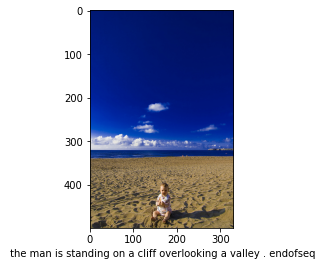

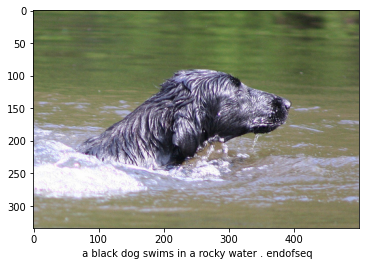

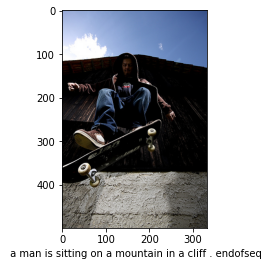

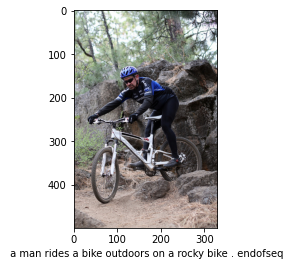

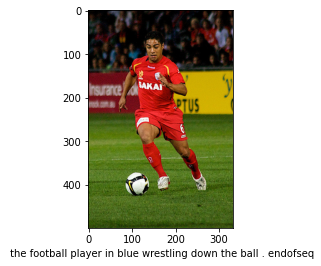

In [48]:
import matplotlib.pyplot as plt

inv_dict = {v:k for k, v in new_dict.items()}
pred=[]
actu=[]
for i in range(5):
    
    no = np.random.randint(1500,7000,(1,1))[0,0]
    
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = images[no]
    print(test_img_path,'========================')
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)
    pred.append(caption.split())
    actu.append(all_captions[test_img_path.split('/')[-1]])
    


In [47]:
all_captions={}

for i in text:
    splited_text=i.split(',')
    #print(splited_text)
    if len(splited_text) ==2: 
      img_name = splited_text[0] 
      caption = splited_text[1]
      if img_name not in all_captions:
          all_captions[img_name] = [caption]                
      else:
          all_captions[img_name].append(caption)

In [49]:
from nltk.translate.bleu_score import corpus_bleu

print('BLEU-1: %f' % corpus_bleu(actu, pred, weights=(1.0, 0, 0, 0)))
print('BLEU-2: %f' % corpus_bleu(actu, pred, weights=(0.5, 0.5, 0, 0)))
print('BLEU-3: %f' % corpus_bleu(actu, pred, weights=(0.3, 0.3, 0.3, 0)))
print('BLEU-4: %f' % corpus_bleu(actu, pred, weights=(0.25, 0.25, 0.25, 0.25)))

BLEU-1: 0.043960
BLEU-2: 0.085694
BLEU-3: 0.111920
BLEU-4: 0.119645


/usr/local/lib/python3.6/dist-packages/nltk/translate/bleu_score.py:490: UserWarning: 
Corpus/Sentence contains 0 counts of 2-gram overlaps.
BLEU scores might be undesirable; use SmoothingFunction().
  warnings.warn(_msg)


/content/drive/My Drive/ml/Flickr8k/test3.jpg ========================


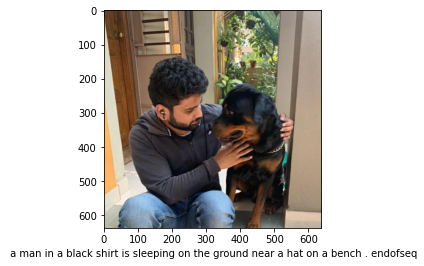

In [53]:
import matplotlib.pyplot as plt

from keras.models import load_model
#model=load_model('/home/sunbeam/Downloads/models/model_49.h5')

def getImage(x):
    
    test_img_path = '/content/drive/My Drive/ml/Flickr8k/test3.jpg'

    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    test_img = cv2.resize(test_img, (224,224))

    test_img = np.reshape(test_img, (1,224,224,3))
    
    return test_img

pred=[]
actu=[]
for i in range(1):
    
    no = np.random.randint(1,8091,(1,1))[0,0]
    
    test_feature = modele.predict(getImage(no)).reshape(1,2048)
    
    test_img_path = '/content/drive/My Drive/ml/Flickr8k/test3.jpg'
    print(test_img_path,'========================')
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)


    text_inp = ['startofseq']

    count = 0
    caption = ''
    while count < 25:
        count += 1

        encoded = []
        for i in text_inp:
            encoded.append(new_dict[i])

        encoded = [encoded]

        encoded = pad_sequences(encoded, padding='post', truncating='post', maxlen=MAX_LEN)


        prediction = np.argmax(model.predict([test_feature, encoded]))

        sampled_word = inv_dict[prediction]

        caption = caption + ' ' + sampled_word
            
        if sampled_word == 'endofseq':
            break

        text_inp.append(sampled_word)
        
    
    plt.figure()
    plt.imshow(test_img)
    plt.xlabel(caption)
    pred.append(caption.split())
    #actu.append(captions_backup[test_img_path.split('/')[-1]])